## **Importing the library**

In [4]:
import numpy as np
import pandas as pd
import re
import torch
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [5]:
#RETRIVING THE DATASETS
df_test=pd.read_csv('/data/nmamit-interns/grp3/new/test.csv')
df_train1=pd.read_csv('/data/nmamit-interns/grp3/new/train.csv')

In [6]:
df_train1.head()

,1,"Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff. It seems that his staff simply never answers the phone. It usually takes 2 hours of repeated calling to get an answer. Who has time for that or wants to deal with it? I have run into this problem with many other doctors and I just don't get it. You have office workers, you have patients with medical needs, why isn't anyone answering the phone? It's incomprehensible and not work the aggravation. It's with regret that I feel that I have to give Dr. Goldberg 2 stars."
0,2,Been going to Dr. Goldberg for over 10 years. ...
1,1,I don't know what Dr. Goldberg was like before...
2,1,I'm writing this review to give you a heads up...
3,2,All the food is great here. But the best thing...
4,1,Wing sauce is like water. Pretty much a lot of...


In [7]:
df_test.head()

,2,"Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years."
0,1,Last summer I had an appointment to get new ti...
1,2,"Friendly staff, same starbucks fair you get an..."
2,1,The food is good. Unfortunately the service is...
3,2,Even when we didn't have a car Filene's Baseme...
4,2,"Picture Billy Joel's \""Piano Man\"" DOUBLED mix..."


In [8]:
#adding the columns names
columns=['target','text']
df_test=pd.read_csv('/data/nmamit-interns/grp3/new/test.csv',names=columns)
df_train1=pd.read_csv('/data/nmamit-interns/grp3/new/train.csv',names=columns)

In [9]:
## USING THE DEVICE
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [10]:
df_train1.head()

,target,text
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [11]:
df_test.head()

,target,text
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...


### **REDUCING THE DATA**

In [14]:
# stratified sampling 
from sklearn.model_selection import train_test_split

df_train, _ = train_test_split(df_train1, test_size=0.8, stratify=df_train1['target'], random_state=42)

print(df_train['target'].value_counts())


target
1    56000
2    56000
Name: count, dtype: int64


In [15]:
df_train.shape

(112000, 2)

In [16]:
df_test.shape

(38000, 2)

In [17]:
print(df_test['target'].value_counts())

target
2    19000
1    19000
Name: count, dtype: int64


In [18]:
df_train.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  38000 non-null  int64 
 1   text    38000 non-null  object
dtypes: int64(1), object(1)
memory usage: 593.9+ KB


### *To check what does 1 and 2 represent*

In [21]:
texts = df_train[df_train['target'] == 1]['text']
text_2 = texts.iloc[0] if not texts.empty else None
print(text_2)

The food was pretty good but the server was so bad it ruined our experience.  Everything you could imagine a server could do wrong happened...Better service would have bumped this review to a 3.5 or 4 star spot.


In [22]:
texts = df_test[df_test['target'] == 2]['text']
text_1 = texts.iloc[0] if not texts.empty else None
print(text_1)

Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years.


#### *2-->postivie 1--> negative*

In [23]:
#converting the lable 1-->0 and 2-->1
df_train.replace(1,0,inplace=True)
df_train.replace(2,1,inplace=True)


In [24]:
df_test.replace(1,0,inplace=True)
df_test.replace(2,1,inplace=True)

In [25]:
df_train['target'].value_counts()

target
0    56000
1    56000
Name: count, dtype: int64

In [26]:
df_test['target'].value_counts()

target
1    19000
0    19000
Name: count, dtype: int64

### **CLEANING THE DATA**

In [27]:
import re

def clean_text(text):
  # Remove special characters and punctuation
  text = re.sub(r"[^\w\s]", " ", text)

  # Remove single characters
  text = re.sub(r"\b[a-zA-Z]\b", " ", text)

  # Remove HTML tags
  text = re.sub(r"<[^>]*>", " ", text)

  # Lowercase the text
  text = text.lower()

  # Use regex to remove numbers
  text = re.sub(r'\d+', '', text)

  # Remove extra whitespace
  text = re.sub(r"\s+", " ", text)

  # Trim leading and trailing spaces
  text = text.strip()

  return text

In [28]:
# Apply the cleaning function to the 'text' column
df_train['text'] = df_train['text'].apply(clean_text)

# Verify the changes
df_train.head()


,target,text
407494,0,the food was pretty good but the server was so...
44351,0,horrible manager she told us we only needed to...
418933,1,love the black bean burger so much so came bac...
394896,0,off the beaten path and you can either park yo...
128149,1,awesome nyc pizza my second favorite nyc style...


In [29]:

# Apply the cleaning function to the 'text' column
df_test['text'] = df_test['text'].apply(clean_text)

# Verify the changes
df_test.head()

,target,text
0,1,contrary to other reviews have zero complaints...
1,0,last summer had an appointment to get new tire...
2,1,friendly staff same starbucks fair you get any...
3,0,the food is good unfortunately the service is ...
4,1,even when we didn have car filene basement was...


### **Saving the model**

In [30]:
import pickle

with open('/data/nmamit-interns/grp3/new/df_train.pkl', 'wb') as f:
    pickle.dump(df_train, f)

with open('/data/nmamit-interns/grp3/new/df_test.pkl', 'wb') as f:
    pickle.dump(df_test, f)

### **Loading the model**

In [1]:
import pickle

with open('/data/nmamit-interns/grp3/new/df_train.pkl','rb') as f:
    df_train=pickle.load(f)

with open('/data/nmamit-interns/grp3/new/df_test.pkl','rb') as f:
    df_test=pickle.load(f)

In [2]:
#to check the length of the text
text_lengths = df_train['text'].apply(len)
max_length = text_lengths.max()
min_length = text_lengths.min()

In [3]:
print(f"Maximum length of text: {max_length}")
print(f"Minimum length of text: {min_length}")

Maximum length of text: 4810
Minimum length of text: 0


In [4]:
#to check the length of the text
text_length = df_test['text'].apply(len)
max_lengths = text_length.max()
min_lengths = text_length.min()


In [5]:
print(f"Maximum length of text: {max_lengths}")
print(f"Minimum length of text: {min_lengths}")

Maximum length of text: 4810
Minimum length of text: 2


In [6]:
#DROPING THE TEXT COLUMN WITH LENGTH ZERO
text_lengths=df_train['text'].apply(len)
rows_to_remove=text_lengths[text_lengths==0].index
df_train.drop(rows_to_remove,inplace=True)

In [7]:
df_train.shape

(111993, 2)

## **Training the data**

In [8]:
from sklearn.model_selection import train_test_split
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
#SPLITTING THE DATA
X_train=df_train['text']
y_train=df_train['target']
X_test=df_test['text']
y_test=df_test['target']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


#### **FEATURE EXTRACTION**

In [10]:
# Function to prune text with TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
def prune_text_with_tfidf(texts, max_features=1000):
    vectorizer = TfidfVectorizer(max_features=max_features)
    x = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    pruned_texts = []
    for i in range(x.shape[0]):
        indices = x[i].indices
        words = [feature_names[idx] for idx in indices]
        pruned_texts.append(' '.join(words))
    return pruned_texts

In [11]:
# Apply TFIDF pruning
X_train_pruned = prune_text_with_tfidf(X_train.tolist())
X_val_pruned = prune_text_with_tfidf(X_val.tolist())
X_test_pruned = prune_text_with_tfidf(df_test['text'].tolist())

In [12]:
#CONVERTING TO THE HUGGING FACE DATASET
from datasets import Dataset
import pandas as pd

#Creating the dataframe with pruned texts
df_train_pruned=pd.DataFrame({'text':X_train_pruned,'label':y_train})
df_val_pruned=pd.DataFrame({'text':X_val_pruned,'label':y_val})
df_test_pruned=pd.DataFrame({'text':X_test_pruned,'label':y_test})

# Convert Pandas DataFrame to Hugging Face Dataset
train_dataset = Dataset.from_pandas(df_train_pruned)
val_dataset = Dataset.from_pandas(df_val_pruned)
test_dataset = Dataset.from_pandas(df_test_pruned)

print(train_dataset)
print(val_dataset)
print(test_dataset)


In [11]:
#CONVERTING TO THE HUGGING FACE DATASET
from datasets import Dataset
import pandas as pd

#Creating the dataframe with pruned texts
df_train_pruned=pd.DataFrame({'text':X_train,'label':y_train})
df_val_pruned=pd.DataFrame({'text':X_val,'label':y_val})
df_test_pruned=pd.DataFrame({'text':X_test,'label':y_test})

# Convert Pandas DataFrame to Hugging Face Dataset
train_dataset = Dataset.from_pandas(df_train_pruned)
val_dataset = Dataset.from_pandas(df_val_pruned)
test_dataset = Dataset.from_pandas(df_test_pruned)

print(train_dataset)
print(val_dataset)
print(test_dataset)


Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 89594
})
Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 22399
})
Dataset({
    features: ['text', 'label'],
    num_rows: 38000
})


#### *COMPUTE METRICS*

In [12]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

## **BERT-base**

In [14]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

#adds the special tokens
def tokenize(batch, tokenizer):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=512, return_tensors='pt')

# Tokenizer for BERT
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# Tokenize using BERT tokenizer
tokenized_train_dataset_bert = train_dataset.map(lambda x: tokenize(x, bert_tokenizer), batched=True)
tokenizd_val_dataset_bert = val_dataset.map(lambda x: tokenize(x, bert_tokenizer), batched=True)
tokenized_test_dataset_bert = test_dataset.map(lambda x: tokenize(x, bert_tokenizer), batched=True)


Map:   0%|          | 0/89594 [00:00<?, ? examples/s]

Map:   0%|          | 0/22399 [00:00<?, ? examples/s]

Map:   0%|          | 0/38000 [00:00<?, ? examples/s]

In [ ]:
# Ensure correct format
tokenized_train_dataset_bert.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
tokenized_val_dataset_bert.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
tokenized_test_dataset_bert.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

In [16]:
# Model for BERT
from transformers import BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
import torch

# Data collator for BERT
data_collator_bert = DataCollatorWithPadding(tokenizer=bert_tokenizer)

bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
# Training arguments for BERT
bert_training_args = TrainingArguments(
    output_dir='/data/nmamit-interns/grp3/new/result/bert',
    num_train_epochs=3, #larger epoch gets overfitted
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    #logging_dir='/data/nmamit-interns/grp3/new/logs/bert',
    logging_steps=10,
    evaluation_strategy="epoch",
    learning_rate=2e-5,  
    lr_scheduler_type='linear'
)


# Trainer for BERT
bert_trainer = Trainer(
    model=bert_model,
    args=bert_training_args,
    train_dataset=tokenized_train_dataset_bert,
    eval_dataset=tokenizd_val_dataset_bert,
    data_collator=data_collator_bert,
    compute_metrics=compute_metrics
)

# Train  BERT
bert_trainer.train()
#evluation
bert_results = bert_trainer.evaluate(tokenized_test_dataset_bert)
print("BERT Results:", bert_results)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/shrishask/.local/lib/python3.10/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.315900,0.306921,0.896692,0.897556,0.900746,0.894389
2,0.162800,0.339796,0.897808,0.900973,0.883881,0.918740
3,0.182700,0.350154,0.902272,0.902793,0.908806,0.896859


BERT Results: {'eval_loss': 0.34424889087677, 'eval_accuracy': 0.9043684210526316, 'eval_f1': 0.9037911680609976, 'eval_precision': 0.9092797783933518, 'eval_recall': 0.8983684210526316, 'eval_runtime': 463.7308, 'eval_samples_per_second': 81.944, 'eval_steps_per_second': 5.122, 'epoch': 3.0}


In [19]:
bert_model.save_pretrained('/data/nmamit-interns/grp3/new/saved_models/bert')
bert_tokenizer.save_pretrained('/data/nmamit-interns/grp3/new/saved_models/bert_tokenizer')

('/data/nmamit-interns/grp3/new/saved_models/bert_tokenizer/tokenizer_config.json',
 '/data/nmamit-interns/grp3/new/saved_models/bert_tokenizer/special_tokens_map.json',
 '/data/nmamit-interns/grp3/new/saved_models/bert_tokenizer/vocab.txt',
 '/data/nmamit-interns/grp3/new/saved_models/bert_tokenizer/added_tokens.json')

In [20]:
from transformers import BertForSequenceClassification, BertTokenizer

# Load the BERT model
loaded_bert_model = BertForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/saved_models/bert')

# Load the BERT tokenizer
loaded_bert_tokenizer = BertTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/saved_models/bert_tokenizer')


In [26]:
df_test.head()

,target,text
0,1,contrary to other reviews have zero complaints...
1,0,last summer had an appointment to get new tire...
2,1,friendly staff same starbucks fair you get any...
3,0,the food is good unfortunately the service is ...
4,1,even when we didn have car filene basement was...


#### *CONFUSION MATRIX / CLASSIFICATION REPORT*

In [22]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the BERT model
loaded_bert_model = BertForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/saved_models/bert')

# Load the BERT tokenizer
loaded_bert_tokenizer = BertTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/saved_models/bert_tokenizer')

# Load your test data
test_texts = df_test['text'].tolist()  
test_labels = df_test['target'].tolist()  

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
loaded_bert_model.to(device)

# Function to get predictions in batches
def get_predictions_in_batches(model, tokenizer, texts, batch_size=32):
    model.eval()
    all_predictions = []
    all_logits = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=512, return_tensors='pt')
        encodings = {key: val.to(device) for key, val in encodings.items()}
        
        with torch.no_grad():
            outputs = model(**encodings)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        
        all_predictions.extend(predictions)
        all_logits.extend(logits.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_logits)

# Get predictions
predictions, logits = get_predictions_in_batches(loaded_bert_model, loaded_bert_tokenizer, test_texts)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

# Generate classification report
print("Classification Report:\n", classification_report(test_labels, predictions))


Confusion Matrix:
 [[17594  1406]
 [ 1593 17407]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     19000
           1       0.93      0.92      0.92     19000

    accuracy                           0.92     38000
   macro avg       0.92      0.92      0.92     38000
weighted avg       0.92      0.92      0.92     38000



### *ROC and AUC*

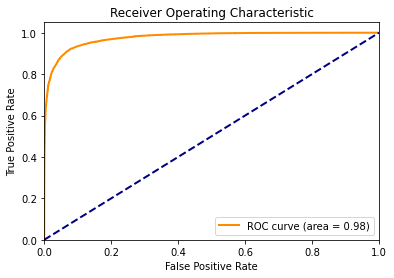

In [23]:
# Calculate ROC curve and AUC
if len(np.unique(test_labels)) == 2:
    fpr, tpr, _ = roc_curve(test_labels, logits[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")

### *PREDICTION*

In [45]:
import torch

# Function to predict a single sample
def predict_single_sample(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Load tokenizer and model (using the provided variable names)
    tokenizer = loaded_bert_tokenizer
    model = loaded_bert_model.to(device)
    
    model.eval()  # Set the model to evaluation mode
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to the same device as the model
    
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=-1).item()
    return "1" if prediction == 1 else "0"

In [47]:
 # Example usage for a single test sample
example_text = df_test['text'].iloc[98]
example_target = df_test['target'].iloc[98]
prediction = predict_single_sample(example_text)
print(f"Input text: {example_text}")
print(f"Actual prediction:{example_target}")
print(f"Example prediction : {prediction}")

Input text: ve heard all the hype and wanted to try it tonight was my second attempt here first time new girl on the grill apologized to me at minutes at walked not even an acknowledgement from the wait staff tonight the waiter seemed mad that didn know what wanted to order after explained that never been there he brought me menu and then proceeded to ignore me for minutes walked again no more tries here maybe doing something wrong haha
Actual prediction:0
Example prediction : 0


## **DistilRoBERTa**

In [16]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tokenizer for DistilRoBERTa
distilroberta_tokenizer = AutoTokenizer.from_pretrained('ProtectAI/distilroberta-base-rejection-v1')

# Function to tokenize batch with special tokens
def tokenize(batch):
    return distilroberta_tokenizer(batch['text'], padding=True, truncation=True, max_length=512)

# Tokenize using DistilRoBERTa tokenizer
tokenized_train_dataset_distilroberta = train_dataset.map(lambda x: tokenize(x), batched=True)
tokenized_val_dataset_distilroberta = val_dataset.map(lambda x: tokenize(x), batched=True)
tokenized_test_dataset_distilroberta = test_dataset.map(lambda x: tokenize(x), batched=True)

# Model for DistilRoBERTa
distilroberta_model = AutoModelForSequenceClassification.from_pretrained('ProtectAI/distilroberta-base-rejection-v1')
distilroberta_model.to(device)  # Move model to device

# Data collator for DistilRoBERTa
data_collator_distilroberta = DataCollatorWithPadding(tokenizer=distilroberta_tokenizer)

# Training arguments for DistilRoBERTa
distilroberta_training_args = TrainingArguments(
    output_dir='/data/nmamit-interns/grp3/new/result/distilroberta',
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy="epoch",
    learning_rate=2e-5, 
    lr_scheduler_type='linear'
)

# Trainer for DistilRoBERTa
distilroberta_trainer = Trainer(
    model=distilroberta_model,
    args=distilroberta_training_args,
    train_dataset=tokenized_train_dataset_distilroberta,
    eval_dataset=tokenized_val_dataset_distilroberta,
    data_collator=data_collator_distilroberta,
    compute_metrics=compute_metrics
)

# Train and evaluate DistilRoBERTa
distilroberta_trainer.train()
distilroberta_results = distilroberta_trainer.evaluate(tokenized_test_dataset_distilroberta)
print("DistilRoBERTa Results:", distilroberta_results)


Map:   0%|          | 0/89594 [00:00<?, ? examples/s]

Map:   0%|          | 0/22399 [00:00<?, ? examples/s]

Map:   0%|          | 0/38000 [00:00<?, ? examples/s]

/home/shrishask/.local/lib/python3.10/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.256600,0.417537,0.894370,0.893901,0.908900,0.879389
2,0.230900,0.459877,0.893522,0.898090,0.870743,0.927210
3,0.171600,0.399492,0.899415,0.900517,0.901352,0.899682


DistilRoBERTa Results: {'eval_loss': 0.3809416592121124, 'eval_accuracy': 0.9037894736842105, 'eval_f1': 0.9037641484601211, 'eval_precision': 0.9040021063717746, 'eval_recall': 0.9035263157894737, 'eval_runtime': 344.2087, 'eval_samples_per_second': 110.398, 'eval_steps_per_second': 6.9, 'epoch': 3.0}


In [17]:
#save the model
distilroberta_model.save_pretrained('/data/nmamit-interns/grp3/new/distilroberta_model')
distilroberta_tokenizer.save_pretrained('/data/nmamit-interns/grp3/new/distilroberta_tokenizer')

('/data/nmamit-interns/grp3/new/distilroberta_tokenizer/tokenizer_config.json',
 '/data/nmamit-interns/grp3/new/distilroberta_tokenizer/special_tokens_map.json',
 '/data/nmamit-interns/grp3/new/distilroberta_tokenizer/vocab.json',
 '/data/nmamit-interns/grp3/new/distilroberta_tokenizer/merges.txt',
 '/data/nmamit-interns/grp3/new/distilroberta_tokenizer/added_tokens.json',
 '/data/nmamit-interns/grp3/new/distilroberta_tokenizer/tokenizer.json')

In [25]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the saved model and tokenizer
loaded_distilroberta_model = AutoModelForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/distilroberta_model')
loaded_distilroberta_tokenizer = AutoTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/distilroberta_tokenizer')


### *FINE TUNING THE MODEL*

In [28]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to tokenize batch with special tokens using loaded tokenizer
def tokenize(batch):
    return loaded_distilroberta_tokenizer(batch['text'], padding=True, truncation=True, max_length=512)

# Tokenize datasets
tokenized_train_dataset = train_dataset.map(tokenize, batched=True)
tokenized_val_dataset = val_dataset.map(tokenize, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize, batched=True)

# Data collator
data_collator = DataCollatorWithPadding(tokenizer=loaded_distilroberta_tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir='/data/nmamit-interns/grp3/new/result/distilroberta_finetuned',
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    lr_scheduler_type='linear'
)

# Trainer
trainer = Trainer(
    model=loaded_distilroberta_model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics  
)

# Fine-tune the model
trainer.train()

# Evaluate on the test dataset
eval_results = trainer.evaluate(eval_dataset=tokenized_test_dataset)
print("Evaluation Results:", eval_results)


Map:   0%|          | 0/89594 [00:00<?, ? examples/s]

Map:   0%|          | 0/22399 [00:00<?, ? examples/s]

Map:   0%|          | 0/38000 [00:00<?, ? examples/s]

/home/shrishask/.local/lib/python3.10/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.146200,0.317241,0.893076,0.897802,0.869350,0.928181
2,0.212000,0.323531,0.898522,0.900747,0.891675,0.910005


Evaluation Results: {'eval_loss': 0.3106069266796112, 'eval_accuracy': 0.9017631578947368, 'eval_f1': 0.9027839266647569, 'eval_precision': 0.893499664931182, 'eval_recall': 0.9122631578947369, 'eval_runtime': 343.8653, 'eval_samples_per_second': 110.508, 'eval_steps_per_second': 6.907, 'epoch': 2.0}


### *CONFUSION MATRIX / CLASSIFICATION REPORT*

In [29]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
 
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the BERT model
loaded_bert_model = AutoModelForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/distilroberta_model')

# Load the BERT tokenizer
loaded_bert_tokenizer =  AutoTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/distilroberta_tokenizer')

# Load your test data
test_texts = df_test['text'].tolist()  
test_labels = df_test['target'].tolist()  

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
loaded_bert_model.to(device)

# Function to get predictions in batches
def get_predictions_in_batches(model, tokenizer, texts, batch_size=32):
    model.eval()
    all_predictions = []
    all_logits = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=512, return_tensors='pt')
        encodings = {key: val.to(device) for key, val in encodings.items()}
        
        with torch.no_grad():
            outputs = model(**encodings)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        
        all_predictions.extend(predictions)
        all_logits.extend(logits.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_logits)

# Get predictions
predictions, logits = get_predictions_in_batches(loaded_bert_model, loaded_bert_tokenizer, test_texts)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

# Generate classification report
print("Classification Report:\n", classification_report(test_labels, predictions))


Confusion Matrix:
 [[17287  1713]
 [ 1543 17457]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91     19000
           1       0.91      0.92      0.91     19000

    accuracy                           0.91     38000
   macro avg       0.91      0.91      0.91     38000
weighted avg       0.91      0.91      0.91     38000



### *ROC and AUC*

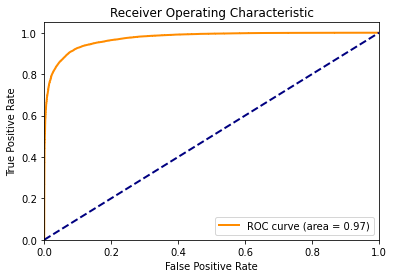

In [30]:
# Calculate ROC curve and AUC
if len(np.unique(test_labels)) == 2:
    fpr, tpr, _ = roc_curve(test_labels, logits[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")

### **PREDICTION**

In [48]:
import torch

# Function to predict a single sample
def predict_single_sample(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Load tokenizer and model (using the provided variable names)
    tokenizer = loaded_distilroberta_tokenizer
    model = loaded_distilroberta_model.to(device)
    
    model.eval()  # Set the model to evaluation mode
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to the same device as the model
    
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=-1).item()
    return "1" if prediction == 1 else "0"

In [49]:
 # Example usage for a single test sample
example_text = df_test['text'].iloc[1]
example_target = df_test['target'].iloc[1]
prediction = predict_single_sample(example_text)
print(f"Input text: {example_text}")
print(f"Actual prediction:{example_target}")
print(f"Example prediction : {prediction}")

Input text: last summer had an appointment to get new tires and had to wait super long time also went in this week for them to fix minor problem with tire they put on they fixed it for free and the very next morning had the same issue called to complain and the manager didn even apologize so frustrated never going back they seem overpriced too
Actual prediction:0
Example prediction : 0


## **RoBERTa**

In [16]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding

# Function to tokenize the dataset using the provided tokenizer
def tokenize(batch, tokenizer):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=512, return_tensors='pt')

# Tokenizer for RoBERTa
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize using RoBERTa tokenizer
tokenized_train_dataset_roberta = train_dataset.map(lambda x: tokenize(x, roberta_tokenizer), batched=True)
tokenized_val_dataset_roberta = val_dataset.map(lambda x: tokenize(x, roberta_tokenizer), batched=True)
tokenized_test_dataset_roberta = test_dataset.map(lambda x: tokenize(x, roberta_tokenizer), batched=True)

Map:   0%|          | 0/89594 [00:00<?, ? examples/s]

Map:   0%|          | 0/22399 [00:00<?, ? examples/s]

Map:   0%|          | 0/38000 [00:00<?, ? examples/s]

In [18]:
# Data collator for RoBERTa
data_collator_roberta = DataCollatorWithPadding(tokenizer=roberta_tokenizer)

# Model for RoBERTa
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base')

# Training arguments for RoBERTa
roberta_training_args = TrainingArguments(
    output_dir='/data/nmamit-interns/grp3/new/result/roberta',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    lr_scheduler_type='linear'
)

# Trainer for RoBERTa
roberta_trainer = Trainer(
    model=roberta_model,
    args=roberta_training_args,
    train_dataset=tokenized_train_dataset_roberta,
    eval_dataset=tokenized_val_dataset_roberta,
    data_collator=data_collator_roberta,
    compute_metrics=compute_metrics
)

# Train RoBERTa
roberta_trainer.train(resume_from_checkpoint=True)

# Evaluate RoBERTa
roberta_results = roberta_trainer.evaluate(tokenized_test_dataset_roberta)
print("RoBERTa Results:", roberta_results)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/shrishask/.local/lib/python3.10/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.242700,0.292165,0.894460,0.897369,0.883333,0.911858
2,0.232500,0.330296,0.896022,0.899556,0.879862,0.920152
3,0.218100,0.331033,0.899415,0.901826,0.890917,0.913005


RoBERTa Results: {'eval_loss': 0.31900325417518616, 'eval_accuracy': 0.9038947368421053, 'eval_f1': 0.9053346466898232, 'eval_precision': 0.8919705792215752, 'eval_recall': 0.9191052631578948, 'eval_runtime': 303.3237, 'eval_samples_per_second': 125.279, 'eval_steps_per_second': 7.83, 'epoch': 3.0}


In [19]:
#saved reberta model 
roberta_model.save_pretrained('/data/nmamit-interns/grp3/new/roberta_model')
roberta_tokenizer.save_pretrained('/data/nmamit-interns/grp3/new/roberta_tokenizer')

('/data/nmamit-interns/grp3/new/roberta_tokenizer/tokenizer_config.json',
 '/data/nmamit-interns/grp3/new/roberta_tokenizer/special_tokens_map.json',
 '/data/nmamit-interns/grp3/new/roberta_tokenizer/vocab.json',
 '/data/nmamit-interns/grp3/new/roberta_tokenizer/merges.txt',
 '/data/nmamit-interns/grp3/new/roberta_tokenizer/added_tokens.json')

In [9]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
# Load the BERT model
loaded_roberta_model =  RobertaForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/roberta_model')

# Load the BERT tokenizer
loaded_roberta_tokenizer = RobertaTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/roberta_tokenizer')


#### *CONFUSION MATRIX / CLASSIFICATION REPORT*

In [21]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
 
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the BERT model
loaded_roberta_model =  RobertaForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/roberta_model')

# Load the BERT tokenizer
loaded_roberta_tokenizer = RobertaTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/roberta_tokenizer')

# Load your test data
test_texts = df_test['text'].tolist()  
test_labels = df_test['target'].tolist()  

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
loaded_roberta_model.to(device)

# Function to get predictions in batches
def get_predictions_in_batches(model, tokenizer, texts, batch_size=32):
    model.eval()
    all_predictions = []
    all_logits = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=512, return_tensors='pt')
        encodings = {key: val.to(device) for key, val in encodings.items()}
        
        with torch.no_grad():
            outputs = model(**encodings)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        
        all_predictions.extend(predictions)
        all_logits.extend(logits.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_logits)

# Get predictions
predictions, logits = get_predictions_in_batches(loaded_roberta_model, loaded_roberta_tokenizer, test_texts)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

# Generate classification report
print("Classification Report:\n", classification_report(test_labels, predictions))


Confusion Matrix:
 [[17802  1198]
 [ 1509 17491]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     19000
           1       0.94      0.92      0.93     19000

    accuracy                           0.93     38000
   macro avg       0.93      0.93      0.93     38000
weighted avg       0.93      0.93      0.93     38000



### *ROC and AUC*

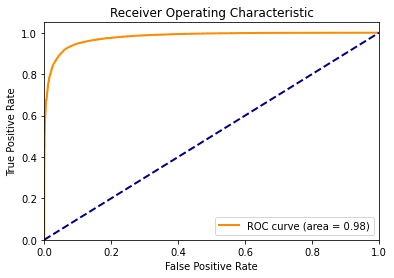

In [22]:
# Calculate ROC curve and AUC
if len(np.unique(test_labels)) == 2:
    fpr, tpr, _ = roc_curve(test_labels, logits[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")

### **PREDICTION**

In [23]:
import torch

# Function to predict a single sample
def predict_single_sample(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Load tokenizer and model (using the provided variable names)
    tokenizer = loaded_roberta_tokenizer
    model = loaded_roberta_model.to(device)
    
    model.eval()  # Set the model to evaluation mode
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to the same device as the model
    
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=-1).item()
    return "1" if prediction == 1 else "0"

In [25]:
 # Example usage for a single test sample
example_text = df_test['text'].iloc[0]
example_target = df_test['target'].iloc[0]
prediction = predict_single_sample(example_text)
print(f"Input text: {example_text}")
print(f"Actual prediction:{example_target}")
print(f"Example prediction : {prediction}")

Input text: contrary to other reviews have zero complaints about the service or the prices have been getting tire service here for the past years now and compared to my experience with places like pep boys these guys are experienced and know what they re doing nalso this is one place that do not feel like am being taken advantage of just because of my gender other auto mechanics have been notorious for capitalizing on my ignorance of cars and have sucked my bank account dry but here my service and road coverage has all been well explained and let up to me to decide nand they just renovated the waiting room it looks lot better than it did in previous years
Actual prediction:1
Example prediction : 0


In [12]:
import torch
import pandas as pd

# Function to predict all samples from the test dataset and identify false predictions
def get_false_predictions(df_test, model, tokenizer):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    false_predictions = []
    
    with torch.no_grad():
        for index, row in df_test.iterrows():
            text = row['text']
            actual_label = row['target']
            
            # Tokenize the text
            inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
            input_ids = inputs['input_ids'].to(device)
            attention_mask = inputs['attention_mask'].to(device)
            
            # Make predictions
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predicted_label = torch.argmax(logits, dim=1).item()
            
            if predicted_label != actual_label:
                decoded_text = tokenizer.decode(input_ids.squeeze().cpu(), skip_special_tokens=True)
                false_predictions.append({
                    'text': decoded_text,
                    'predicted_label': predicted_label,
                    'actual_label': actual_label
                })
    
    return false_predictions

# Get false predictions
false_predictions = get_false_predictions(df_test, loaded_roberta_model, loaded_roberta_tokenizer)

# Create a DataFrame and save to CSV
false_predictions_df = pd.DataFrame(false_predictions)
false_predictions_df.to_csv('/data/nmamit-interns/grp3/new/wrong_predictions.csv', index=False)

print("False predictions saved to 'false_predictions.csv'")


False predictions saved to 'false_predictions.csv'


### **DistilBERT**

In [26]:
import os
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding

# Function to tokenize the dataset using the provided tokenizer
def tokenize(batch, tokenizer):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=512)

# Tokenizer for DistilBERT
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize using DistilBERT tokenizer
tokenized_train_dataset_distilbert = train_dataset.map(lambda x: tokenize(x, distilbert_tokenizer), batched=True)
tokenized_val_dataset_distilbert = val_dataset.map(lambda x: tokenize(x, distilbert_tokenizer), batched=True)
tokenized_test_dataset_distilbert = test_dataset.map(lambda x: tokenize(x, distilbert_tokenizer), batched=True)


Map:   0%|          | 0/89594 [00:00<?, ? examples/s]

Map:   0%|          | 0/22399 [00:00<?, ? examples/s]

Map:   0%|          | 0/38000 [00:00<?, ? examples/s]

In [28]:

# Data collator for DistilBERT
data_collator_distilbert = DataCollatorWithPadding(tokenizer=distilbert_tokenizer)

# Model for DistilBERT
distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Training arguments for DistilBERT with limited checkpointing
distilbert_training_args = TrainingArguments(
    output_dir='/data/nmamit-interns/grp3/new/result/distilbert',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    lr_scheduler_type='linear',
)

# Trainer for DistilBERT
distilbert_trainer = Trainer(
    model=distilbert_model,
    args=distilbert_training_args,
    train_dataset=tokenized_train_dataset_distilbert,
    eval_dataset=tokenized_val_dataset_distilbert,
    data_collator=data_collator_distilbert,
    compute_metrics=compute_metrics
)

# Train DistilBERT and automatically resume from the latest checkpoint if available
distilbert_trainer.train(resume_from_checkpoint=True)

# Evaluate DistilBERT
distilbert_results = distilbert_trainer.evaluate(tokenized_test_dataset_distilbert)
print("DistilBERT Results:", distilbert_results)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/shrishask/.local/lib/python3.10/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.276200,0.289463,0.893522,0.890501,0.928305,0.855656
2,0.178700,0.290552,0.899103,0.901850,0.888043,0.916093
3,0.227600,0.325209,0.900710,0.902078,0.900334,0.903829


DistilBERT Results: {'eval_loss': 0.3132319450378418, 'eval_accuracy': 0.9029736842105263, 'eval_f1': 0.9035548928823668, 'eval_precision': 0.8981746320661501, 'eval_recall': 0.909, 'eval_runtime': 219.4082, 'eval_samples_per_second': 173.193, 'eval_steps_per_second': 10.825, 'epoch': 3.0}


In [29]:
distilbert_model.save_pretrained('/data/nmamit-interns/grp3/new/distilbert_model')
distilbert_tokenizer.save_pretrained('/data/nmamit-interns/grp3/new/distilbert_tokenizer')

('/data/nmamit-interns/grp3/new/distilbert_tokenizer/tokenizer_config.json',
 '/data/nmamit-interns/grp3/new/distilbert_tokenizer/special_tokens_map.json',
 '/data/nmamit-interns/grp3/new/distilbert_tokenizer/vocab.txt',
 '/data/nmamit-interns/grp3/new/distilbert_tokenizer/added_tokens.json')

#### *CONFUSION MATRIX / CLASSIFICATION REPORT*

In [30]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
 
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the BERT model
loaded_distilbert_model =  DistilBertForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/distilbert_model')

# Load the BERT tokenizer
loaded_distilbert_tokenizer = DistilBertTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/distilbert_tokenizer')

# Load your test data
test_texts = df_test['text'].tolist()  
test_labels = df_test['target'].tolist()  

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
loaded_distilbert_model.to(device)

# Function to get predictions in batches
def get_predictions_in_batches(model, tokenizer, texts, batch_size=32):
    model.eval()
    all_predictions = []
    all_logits = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=512, return_tensors='pt')
        encodings = {key: val.to(device) for key, val in encodings.items()}
        
        with torch.no_grad():
            outputs = model(**encodings)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        
        all_predictions.extend(predictions)
        all_logits.extend(logits.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_logits)

# Get predictions
predictions, logits = get_predictions_in_batches(loaded_distilbert_model, loaded_distilbert_tokenizer, test_texts)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

# Generate classification report
print("Classification Report:\n", classification_report(test_labels, predictions))


Confusion Matrix:
 [[17461  1539]
 [ 1449 17551]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     19000
           1       0.92      0.92      0.92     19000

    accuracy                           0.92     38000
   macro avg       0.92      0.92      0.92     38000
weighted avg       0.92      0.92      0.92     38000



### *ROC and AUC*

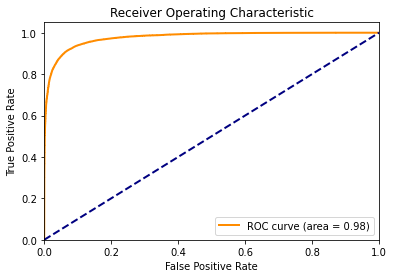

In [31]:
# Calculate ROC curve and AUC
if len(np.unique(test_labels)) == 2:
    fpr, tpr, _ = roc_curve(test_labels, logits[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")

### **PREDICTION**

In [32]:
import torch

# Function to predict a single sample
def predict_single_sample(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Load tokenizer and model (using the provided variable names)
    tokenizer = loaded_distilbert_tokenizer
    model = loaded_distilbert_model.to(device)
    
    model.eval()  # Set the model to evaluation mode
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to the same device as the model
    
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=-1).item()
    return "1" if prediction == 1 else "0"

In [35]:
 # Example usage for a single test sample
example_text = df_test['text'].iloc[98]
example_target = df_test['target'].iloc[98]
prediction = predict_single_sample(example_text)
print(f"Input text: {example_text}")
print(f"Actual prediction:{example_target}")
print(f"Example prediction : {prediction}")

Input text: ve heard all the hype and wanted to try it tonight was my second attempt here first time new girl on the grill apologized to me at minutes at walked not even an acknowledgement from the wait staff tonight the waiter seemed mad that didn know what wanted to order after explained that never been there he brought me menu and then proceeded to ignore me for minutes walked again no more tries here maybe doing something wrong haha
Actual prediction:0
Example prediction : 0


## **AlBERT**

In [15]:
import os
from transformers import AlbertTokenizer, AlbertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding

# Function to tokenize the dataset using the provided tokenizer
def tokenize(batch, tokenizer):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=512)

# Tokenizer for ALBERT
albert_tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

# Tokenize using ALBERT tokenizer
tokenized_train_dataset_albert = train_dataset.map(lambda x: tokenize(x, albert_tokenizer), batched=True)
tokenized_val_dataset_albert = val_dataset.map(lambda x: tokenize(x, albert_tokenizer), batched=True)
tokenized_test_dataset_albert = test_dataset.map(lambda x: tokenize(x, albert_tokenizer), batched=True)

# Data collator for ALBERT
data_collator_albert = DataCollatorWithPadding(tokenizer=albert_tokenizer)

# Model for ALBERT
albert_model = AlbertForSequenceClassification.from_pretrained('albert-base-v2')

# Training arguments for ALBERT with limited checkpointing
albert_training_args = TrainingArguments(
    output_dir='/data/nmamit-interns/grp3/new/result/albert',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    lr_scheduler_type='linear',
)

# Trainer for ALBERT
albert_trainer = Trainer(
    model=albert_model,
    args=albert_training_args,
    train_dataset=tokenized_train_dataset_albert,
    eval_dataset=tokenized_val_dataset_albert,
    data_collator=data_collator_albert,
    compute_metrics=compute_metrics
)

# Train ALBERT 
albert_trainer.train(resume_from_checkpoint=True)

# Evaluate ALBERT
albert_results = albert_trainer.evaluate(tokenized_test_dataset_albert)
print("ALBERT Results:", albert_results)


Map:   0%|          | 0/89594 [00:00<?, ? examples/s]

Map:   0%|          | 0/22399 [00:00<?, ? examples/s]

Map:   0%|          | 0/38000 [00:00<?, ? examples/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/shrishask/.local/lib/python3.10/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.364600,0.344576,0.887093,0.889006,0.884464,0.893594
2,0.238600,0.351147,0.891692,0.893839,0.886699,0.901094
3,0.296600,0.321257,0.893611,0.894018,0.901354,0.886801


ALBERT Results: {'eval_loss': 0.30608633160591125, 'eval_accuracy': 0.8998421052631579, 'eval_f1': 0.8996678441503664, 'eval_precision': 0.9012358719763388, 'eval_recall': 0.8981052631578947, 'eval_runtime': 170.957, 'eval_samples_per_second': 222.278, 'eval_steps_per_second': 13.892, 'epoch': 3.0}


In [16]:
#SAVING THE MODEL
albert_model.save_pretrained('/data/nmamit-interns/grp3/new/albert_model')
albert_tokenizer.save_pretrained('/data/nmamit-interns/grp3/new/albert_tokenizer')

('/data/nmamit-interns/grp3/new/albert_tokenizer/tokenizer_config.json',
 '/data/nmamit-interns/grp3/new/albert_tokenizer/special_tokens_map.json',
 '/data/nmamit-interns/grp3/new/albert_tokenizer/spiece.model',
 '/data/nmamit-interns/grp3/new/albert_tokenizer/added_tokens.json')

#### *CONFUSION MATRIX / CLASSIFICATION REPORT*

In [18]:
import torch
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the BERT model
loaded_albert_model =  AlbertForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/albert_model')

# Load the BERT tokenizer
loaded_albert_tokenizer = AlbertTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/albert_tokenizer')

# Load your test data
test_texts = df_test['text'].tolist()  
test_labels = df_test['target'].tolist()  

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
loaded_albert_model.to(device)

# Function to get predictions in batches
def get_predictions_in_batches(model, tokenizer, texts, batch_size=32):
    model.eval()
    all_predictions = []
    all_logits = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=512, return_tensors='pt')
        encodings = {key: val.to(device) for key, val in encodings.items()}
        
        with torch.no_grad():
            outputs = model(**encodings)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        
        all_predictions.extend(predictions)
        all_logits.extend(logits.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_logits)

# Get predictions
predictions, logits = get_predictions_in_batches(loaded_albert_model, loaded_albert_tokenizer, test_texts)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

# Generate classification report
print("Classification Report:\n", classification_report(test_labels, predictions))


Confusion Matrix:
 [[17511  1489]
 [ 1866 17134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     19000
           1       0.92      0.90      0.91     19000

    accuracy                           0.91     38000
   macro avg       0.91      0.91      0.91     38000
weighted avg       0.91      0.91      0.91     38000



### *ROC and AUC*

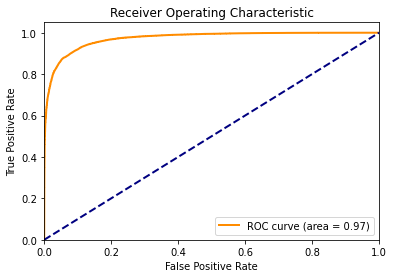

In [19]:
# Calculate ROC curve and AUC
if len(np.unique(test_labels)) == 2:
    fpr, tpr, _ = roc_curve(test_labels, logits[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")

### **PREDICTION**

In [20]:
import torch

# Function to predict a single sample
def predict_single_sample(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Load tokenizer and model (using the provided variable names)
    tokenizer = loaded_albert_tokenizer
    model = loaded_albert_model.to(device)
    
    model.eval()  # Setting the model to evaluation mode
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}  
    
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=-1).item()
    return "1" if prediction == 1 else "0"

In [22]:
 # Example usage for a single test sample
example_text = df_test['text'].iloc[0]
example_target = df_test['target'].iloc[0]
prediction = predict_single_sample(example_text)
print(f"Input text: {example_text}")
print(f"Actual prediction:{example_target}")
print(f"Example prediction : {prediction}")

Input text: contrary to other reviews have zero complaints about the service or the prices have been getting tire service here for the past years now and compared to my experience with places like pep boys these guys are experienced and know what they re doing nalso this is one place that do not feel like am being taken advantage of just because of my gender other auto mechanics have been notorious for capitalizing on my ignorance of cars and have sucked my bank account dry but here my service and road coverage has all been well explained and let up to me to decide nand they just renovated the waiting room it looks lot better than it did in previous years
Actual prediction:1
Example prediction : 0


In [14]:
import os
from transformers import AlbertTokenizer, AlbertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding

# Function to tokenize the dataset using the provided tokenizer
def tokenize(batch, tokenizer):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=512)

# Tokenizer for ALBERT
albert_tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

# Tokenize using ALBERT tokenizer
tokenized_train_dataset_albert = train_dataset.map(lambda x: tokenize(x, albert_tokenizer), batched=True)
tokenized_val_dataset_albert = val_dataset.map(lambda x: tokenize(x, albert_tokenizer), batched=True)
tokenized_test_dataset_albert = test_dataset.map(lambda x: tokenize(x, albert_tokenizer), batched=True)

# Data collator for ALBERT
data_collator_albert = DataCollatorWithPadding(tokenizer=albert_tokenizer)

# Model for ALBERT
albert_model = AlbertForSequenceClassification.from_pretrained('albert-base-v2')

# Training arguments for ALBERT with limited checkpointing
albert_training_args = TrainingArguments(
    output_dir='/data/nmamit-interns/grp3/new/result/alberta1',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    lr_scheduler_type='linear',
)

# Trainer for ALBERT
albert_trainer = Trainer(
    model=albert_model,
    args=albert_training_args,
    train_dataset=tokenized_train_dataset_albert,
    eval_dataset=tokenized_val_dataset_albert,
    data_collator=data_collator_albert,
    compute_metrics=compute_metrics
)

# Train ALBERT 
albert_trainer.train()

# Evaluate ALBERT
albert_results = albert_trainer.evaluate(tokenized_test_dataset_albert)
print("ALBERT Results:", albert_results)


Map:   0%|          | 0/89594 [00:00<?, ? examples/s]

Map:   0%|          | 0/22399 [00:00<?, ? examples/s]

Map:   0%|          | 0/38000 [00:00<?, ? examples/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/shrishask/.local/lib/python3.10/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


ValueError: No valid checkpoint found in output directory (/data/nmamit-interns/grp3/new/result/alberta1)

In [16]:
from transformers import Trainer, TrainingArguments, AlbertForSequenceClassification, DataCollatorWithPadding
import torch

# Data collator for ALBERT
data_collator_albert = DataCollatorWithPadding(tokenizer=albert_tokenizer)

# Model for ALBERT
albert_model = AlbertForSequenceClassification.from_pretrained('albert-base-v2')

# Training arguments for ALBERT with gradient accumulation and mixed precision
albert_training_args = TrainingArguments(
    output_dir='/data/nmamit-interns/grp3/new/result/alberta1',
    num_train_epochs=3,  # Keep epochs as is
    per_device_train_batch_size=8,  # Keep batch size as is
    per_device_eval_batch_size=16,  # Keep batch size as is
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    lr_scheduler_type='linear',
)

# Trainer for ALBERT
albert_trainer = Trainer(
    model=albert_model,
    args=albert_training_args,
    train_dataset=tokenized_train_dataset_albert,
    eval_dataset=tokenized_val_dataset_albert,
    data_collator=data_collator_albert,
    compute_metrics=compute_metrics
)

# Free up CUDA memory
torch.cuda.empty_cache()

# Train ALBERT 
try:
    albert_trainer.train()
except RuntimeError as e:
    print(f"RuntimeError during training: {e}")
    torch.cuda.empty_cache()
    albert_trainer.train()

# Evaluate ALBERT
albert_results = albert_trainer.evaluate(tokenized_test_dataset_albert)
print("ALBERT Results:", albert_results)


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/shrishask/.local/lib/python3.10/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


RuntimeError during training: CUDA out of memory. Tried to allocate 96.00 MiB. GPU 0 has a total capacity of 79.14 GiB of which 53.44 MiB is free. Process 1347921 has 24.94 GiB memory in use. Process 1366560 has 7.83 GiB memory in use. Process 1564409 has 7.72 GiB memory in use. Process 2064778 has 28.71 GiB memory in use. Process 2594307 has 8.91 GiB memory in use. Including non-PyTorch memory, this process has 928.00 MiB memory in use. Of the allocated memory 406.48 MiB is allocated by PyTorch, and 21.52 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)


OutOfMemoryError: CUDA out of memory. Tried to allocate 96.00 MiB. GPU 0 has a total capacity of 79.14 GiB of which 5.44 MiB is free. Process 1347921 has 24.94 GiB memory in use. Process 1366560 has 7.83 GiB memory in use. Process 1564409 has 7.72 GiB memory in use. Process 2064778 has 28.71 GiB memory in use. Process 2594307 has 8.91 GiB memory in use. Including non-PyTorch memory, this process has 976.00 MiB memory in use. Of the allocated memory 459.22 MiB is allocated by PyTorch, and 16.78 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
resume_from_checkpoint=True

In [ ]:
import torch
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the BERT model
loaded_albert_model =  AlbertForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/albert_model')

# Load the BERT tokenizer
loaded_albert_tokenizer = AlbertTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/albert_tokenizer')

# Load your test data
test_texts = df_test['text'].tolist()  
test_labels = df_test['target'].tolist()  

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
loaded_albert_model.to(device)

# Function to get predictions in batches
def get_predictions_in_batches(model, tokenizer, texts, batch_size=32):
    model.eval()
    all_predictions = []
    all_logits = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=512, return_tensors='pt')
        encodings = {key: val.to(device) for key, val in encodings.items()}
        
        with torch.no_grad():
            outputs = model(**encodings)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        
        all_predictions.extend(predictions)
        all_logits.extend(logits.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_logits)

# Get predictions
predictions, logits = get_predictions_in_batches(loaded_albert_model, loaded_albert_tokenizer, test_texts)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

# Generate classification report
print("Classification Report:\n", classification_report(test_labels, predictions))
